## Linear Regression
#### - relationship between independent (predictor, features, input) and dependent (response, target, label, output) variables

### Simple linear regression model can be described with below equation.
## y = a + b * x
### y: response, x: predictor, a, b: constant coefficients

In [13]:
#import libraries
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualization
from sklearn.linear_model import LinearRegression #ML library

#class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)

In [14]:
#Generate random sample data
x=list(range(150))
y=np.random.randint(1,20,150)+x

x_train=np.array(x)
y_train=np.array(y)

In [15]:
#Checking the elements of train_x and train_y arrays
print("x:",x_train[0:10], "\ny:",y_train[0:10])

x: [0 1 2 3 4 5 6 7 8 9] 
y: [14 19 14 22  9 24 19 22 26 10]


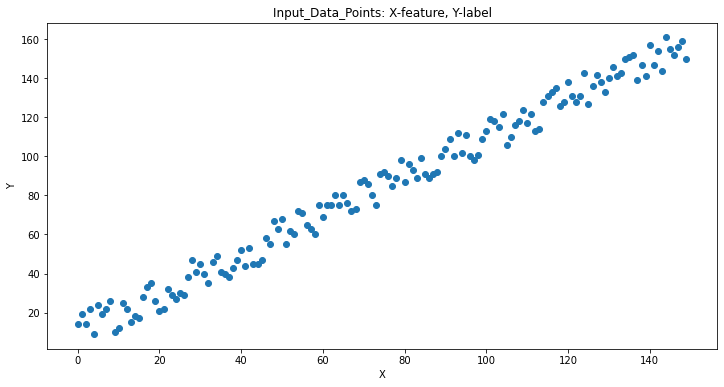

In [16]:
#Plotting data_points
plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input_Data_Points: X-feature, Y-label')
plt.show()

In [17]:
print(x_train)
print('___________________________________')
print('Shape of raw data:', x_train.shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149]
___________________________________
Shape of raw data: (150,)


## Adding dimensions to numpy.arrays: newaxis vs reshape vs expand_dims
##### Simply put, numpy. newaxis is used to increase the dimension of the existing array by one more dimension

#### One reason to use numpy.newaxis over ndarray.reshape is when you have more than one "unknown" dimension to operate with. for example:

See also 

In [18]:
x=list(range(150))
X=np.array(x)
print(X.shape)
print(np.expand_dims(X, axis=1).shape)                                                                  
print(X[:, np.newaxis].shape)
print(X.reshape(-1, 1).shape)


(150,)
(150, 1)
(150, 1)
(150, 1)


In [19]:
X1 = np.array([[1, 2, 3], [4, 5, 6]], np.int32)
print(X1.shape)
print(np.expand_dims(X1, axis=1).shape)                                                                  
print(X1[:, np.newaxis, :].shape)
#print(X1.reshape(-1, 1, -1).shape)
#ValueError: can only specify one unknown dimension

(2, 3)
(2, 1, 3)
(2, 1, 3)


In [20]:
print(x_train[:,np.newaxis])
print('______________________________________')
print('Shape of x_train:',x_train[:,np.newaxis].shape)
print('Shape of y_train:',y_train[:,np.newaxis].shape)

[[  0]
 [  1]
 [  2]
 [  3]
 [  4]
 [  5]
 [  6]
 [  7]
 [  8]
 [  9]
 [ 10]
 [ 11]
 [ 12]
 [ 13]
 [ 14]
 [ 15]
 [ 16]
 [ 17]
 [ 18]
 [ 19]
 [ 20]
 [ 21]
 [ 22]
 [ 23]
 [ 24]
 [ 25]
 [ 26]
 [ 27]
 [ 28]
 [ 29]
 [ 30]
 [ 31]
 [ 32]
 [ 33]
 [ 34]
 [ 35]
 [ 36]
 [ 37]
 [ 38]
 [ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [ 47]
 [ 48]
 [ 49]
 [ 50]
 [ 51]
 [ 52]
 [ 53]
 [ 54]
 [ 55]
 [ 56]
 [ 57]
 [ 58]
 [ 59]
 [ 60]
 [ 61]
 [ 62]
 [ 63]
 [ 64]
 [ 65]
 [ 66]
 [ 67]
 [ 68]
 [ 69]
 [ 70]
 [ 71]
 [ 72]
 [ 73]
 [ 74]
 [ 75]
 [ 76]
 [ 77]
 [ 78]
 [ 79]
 [ 80]
 [ 81]
 [ 82]
 [ 83]
 [ 84]
 [ 85]
 [ 86]
 [ 87]
 [ 88]
 [ 89]
 [ 90]
 [ 91]
 [ 92]
 [ 93]
 [ 94]
 [ 95]
 [ 96]
 [ 97]
 [ 98]
 [ 99]
 [100]
 [101]
 [102]
 [103]
 [104]
 [105]
 [106]
 [107]
 [108]
 [109]
 [110]
 [111]
 [112]
 [113]
 [114]
 [115]
 [116]
 [117]
 [118]
 [119]
 [120]
 [121]
 [122]
 [123]
 [124]
 [125]
 [126]
 [127]
 [128]
 [129]
 [130]
 [131]
 [132]
 [133]
 [134]
 [135]
 [136]
 [137]
 [138]
 [139]
 [140]
 [141]
 [142]

In [21]:
#Build linear model and fit a test data
model = LinearRegression(fit_intercept=True)
model.fit(x_train[:,np.newaxis], y_train[:,np.newaxis])

LinearRegression()

In [22]:
#Prediction
yfit=model.predict(x_train[:,np.newaxis])

In [23]:
#Understand yfit (predicted label)
print(yfit.shape)

(150, 1)


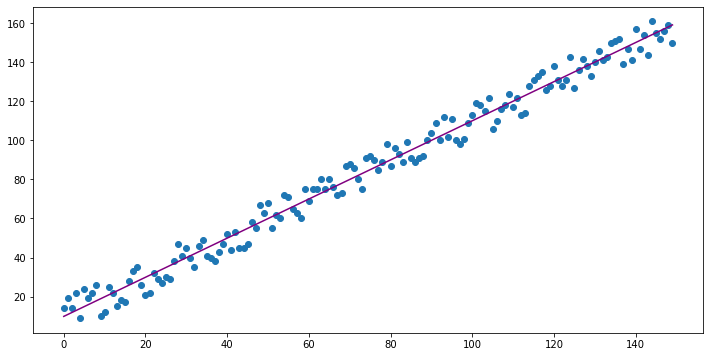

In [24]:
#Plotting the results.
plt.figure(figsize=(12,6))
plt.scatter(x_train, y_train)
plt.plot(x_train, yfit, color='purple');
plt.show()

In [25]:
#Finally, we check model by calculating coefficients manually, 
#We use y=a+bx formula to calculate elements of x_train array and compare them with yfit outputs
print("Coef:",model.coef_, " Intercept:",model.intercept_)

Coef: [[1.00290146]]  Intercept: [9.81050773]


In [26]:
print(model.intercept_+model.coef_*[1,2,3,4]) #using formula

print(yfit[1:5]) #using model_prediction


[[10.81340919 11.81631065 12.81921211 13.82211358]]
[[10.81340919]
 [11.81631065]
 [12.81921211]
 [13.82211358]]


#### The results are the same


## Polynomial Regression (nonlinear)
### - It is a nonlinear relationship between independent x and dependent y variables

In [27]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [28]:
#Generate data or use your own dataset
n = 450 #no. of data
x = list(range(n))
x = [i/100 for i in x]


def GetPolyData(x):    
    return np.sin(x) + np.random.uniform(-.2, .2, n) 

y = GetPolyData(x)
x_train1 = np.array(x)
y_train1 = np.array(y)
print(x_train1)

print('Shape x_train:',x_train1.shape)
print('Shape y_train:',y_train1.shape)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
 1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
 1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
 1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
 1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
 1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95
 1.96 

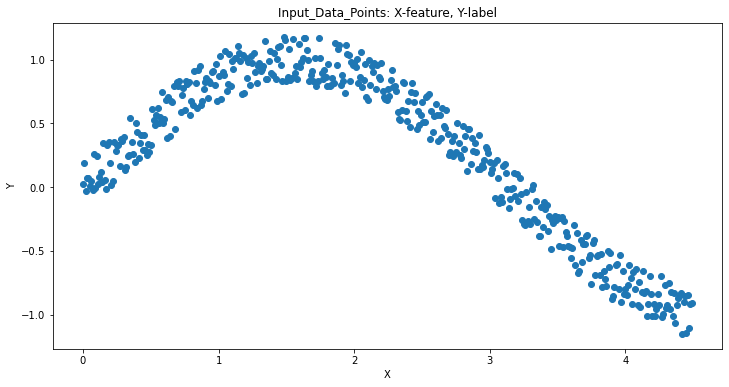

In [29]:
#check data visually by creating a scatter plot
plt.figure(figsize=(12,6))
plt.scatter(x_train1, y_train1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Input_Data_Points: X-feature, Y-label')
plt.show()

In [31]:
#reshape
print('reshape:', x_train1.reshape(-1, 1).shape)

#Define the polynomial model with PolymonialFeatures class fit it on training data
polyModel = PolynomialFeatures(degree = 4)
xpol = polyModel.fit_transform(x_train1.reshape(-1, 1)) 

#Generate polynomial and interaction features
preg = polyModel.fit(xpol,y_train1)
print(preg)

reshape: (450, 1)
PolynomialFeatures(degree=4)


In [32]:
#need a linear model and we'll define it and fit on training data. Then we'll predict the x data with the model
liniearModel = LinearRegression(fit_intercept = True)
l=liniearModel.fit(xpol, y_train1[:, np.newaxis])
polyfit = liniearModel.predict(preg.fit_transform(x_train1.reshape(-1, 1)))
print(l)

LinearRegression()


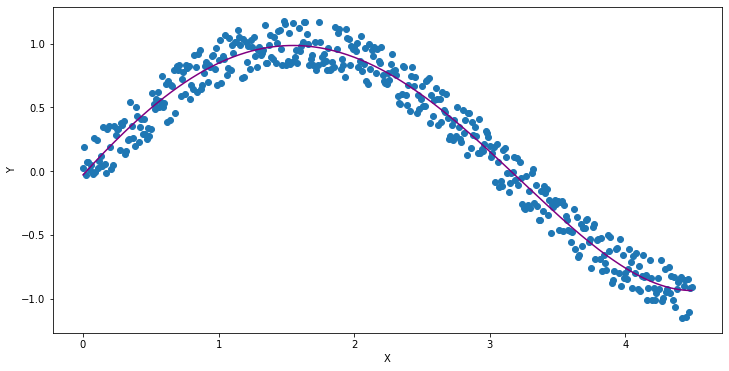

In [33]:
#plot the fitted curve
plt.figure(figsize=(12,6))
plt.scatter(x_train1, y_train1)
plt.plot(x_train1, polyfit, color = 'purple')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('')
plt.show()

## Tips:
#### LinearRegression fits a linear model with coefficients to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation

### See also:
1. sklearn.linear_model.Ridge
   * Ridge regression addresses some of the problems of Ordinary Least Squares by imposing a penalty on the size of the coefficients with l2 regularization.

2. sklearn.linear_model.Lasso
    * The Lasso is a linear model that estimates sparse coefficients with l1 regularization.

3. sklearn.linear_model.ElasticNet
    * Elastic-Net is a linear regression model trained with both l1 and l2 -norm regularization of the coefficients.